# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

The Smartcab does not seem to move at all during the simulation as the agent state is never updated and is always idled at the light. At each step, the driving agent seems to be receiving different rewards based on how long it has been idling and what the color of the light is at the time. The agent is receiving negative rewards as it idles for a green light (when there is no oncoming traffic; positive for when there is oncoming traffic) and positive rewards as it idles for a red light. There seems to be more extreme negative rewards for idling at a green light than positive rewards for idling at a red light (or green with oncoming traffic). This might indiciate that it is important for our driving agent to get to where its going quickly.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

<b>agent.py</b> - Three flags that can be set include the following:
<br><br>
<i>'learning'</i> This flag depicts whether or not the agent is to use Q-learning. Without it, the simulation would be running without an optimal action-selection algorithm, and would thus be choosing actions in some other format (possibly completely ranom selection).
<br><br>
<i>'enforce_deadline'</i> This flag can be set to enforce a deadline on the simulation. Without, the simulation of the agent would not know when the agent should be reaching it's destination by.
<br><br>
<i>'grid_size'</i> This flag determines the number of intersections in the simulation. The possible changes are implemented by giving the finite number of rows and columns in the simulation grid.
<br>
<br>
<b>environment.py</b> When an agent performs an action, the <i>act</i> function is called to assess the implications of the action that was taken, including the rewards, whether or not the agent can move based on the action chosen, etc.
<br>
<br>
<b>simulator.py</b> The difference between the 'render_text()' function and the 'render()' function is that the 'render()' function is the GUI render display of the simulation and the 'render_text()' function is the Non-GUI render display of the simulation, or the command prompt or terminal interface.
<br>
<br>
<b>planner.py</b> The 'next_waypoint()' function considers the East-West direction first so long as the current location is not the final destination.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simulation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


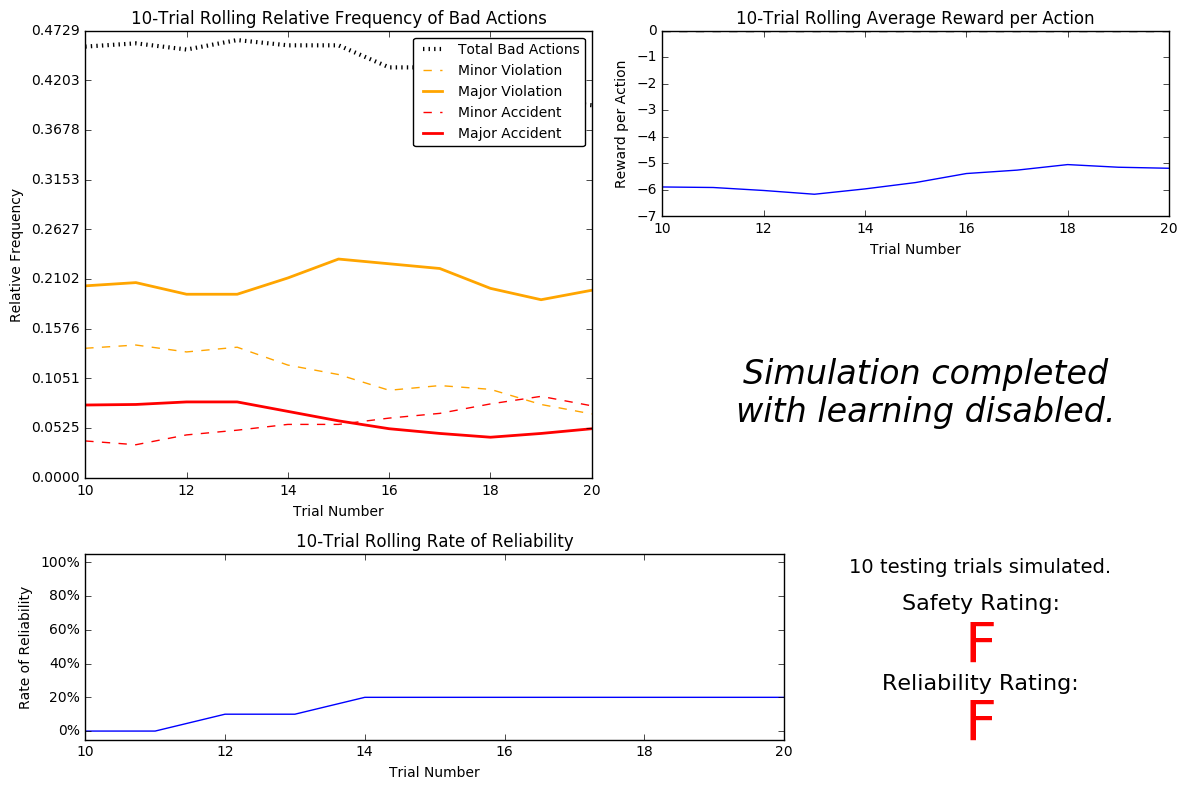

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

To begin, the results of the initial simulation yield a very bad safety and reliability rating, which imply that there is much work to be done. 
<br><br>The driving agent is making bad decision roughly 43% of the time. Because of these bad decisions, the driving agent is causing minor accidents roughly 5% of the time, and even worse, it is causing major accidents rouhgly 8-10% of the time. These bad decisions are also resulting in minor violations roughly 10% of the time, and major violations roughly 22% of the time.
<br><br>Since the agent is driving randomly, the rate of reliability would be expected to be roughly 20%, as the agent can choose from 1 of 4 possible actions. With 20 trials, we are seeing about a 20% rate of reliability, which makes sense given our action possibilities.
<br><br> We have an average reward per action of a little less than -6. This implies our driving agent is being penalized quite heavily, which make sense given how often it is making bad decisions.
<br><br> As the number of trials increase, the results only slightly change. The lack of any significant difference in the outcome as the number of trials increase is likely due to the lack of the agent's learning capabilities.
<br><br> This <i>Smartcab</i> would not be considered safe <b>OR</b> reliable. This is evident when simply looking at the sfety and reliability ratings on the 10 testing trials that were simulated, but also obvious by assessing the training trial results (i.e. the frequency of bad decisions, violations and accidents, reliability %, average reward per action).

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

The features that are available to the agent that seem most relevant for learning both safety and efficiency are the 'inputs' and the 'deadline'. The 'inputs' would measure safety by assessing the traffic in all directions and whether or not the light allows for a progressive action to be taken. For example, the <i>Smartcab</i> can learn the the direction in which traffic oncoming, traffic from the left and traffic from the right intend to travel. This will ultimately allow for an optimal decision in regards to safety to be learned. In addition to surrounding traffic, the 'light' feature is just as important (if not more important) in optimizing safety. With these features learned, the smartcab can ultimately reduce its risk of violating a traffic law or causing an accident by making a bad decision. The 'waypoint' would be a measure of efficiency, as the as it would indicate if the agent is traveling towards its destination. This feature would be important to be learned as it will ultimately optimize the efficiency of the driving agent.
<br><br>
The 'deadline' feature does not seem <i>irrelevant</i> by any means, but it does not seem like it would be <i>as</i> relevant in determinig efficiency (and not at all relevant in determining safety) as arriving to the destination before the alotted time seems more like a pass or fail outcome and less of something that needs to be learned in order <i>to pass or fail</i>. The better measure for learning rather than just knowing whether or not the driving agent makes it to the destination would be the direction the agent should travel leading to its destination, or 'waypoint'. Again, that's not to say that 'deadline' would not be a relevant feature.
<br><br>
Given that breakdown, I would assume that all of the features (with the exception of 'deadline') would be relevant for learning in determining safety and efficiency (but no features relevant for both).

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

From question 4, I concluded that all of the features would be relevant, which equates to a total of 6 relevant features as the 'inputs' are broken out into 4 separate features. Examining each of the 6 features, I determined that each one would have any of the following set of possible choices:
<br><br>
'waypoint' - 3 choices: Left/Right/Forward
<br><br>
'light' - 2 choices: Red/Green (According to the TrafficLight.valid_states in <i>environment.py</i>)
<br><br>
'left' - 4 choices: Left/Right/Forward/None (no traffic from this direction)
<br><br>
'right' - 4 choices: Left/Right/Forward/None (no traffic from this direction)
<br><br>
'oncoming' - 4 choices: Left/Right/Forward/None (no traffic from this direction)
<br><br>
Using all of the features as relevant, the dimension of the state space would be 384. This could be more difficult to learn a policy for each possible state within a reasonable number of training trials. One way to make this more reasonable is removing some of the features. I will start with removing the 'left' and 'right' inputs as the driving agent should have the right away regardless of its 'waypoint' when the light is green when compared to traffic coming from the left or right (this same logic implies why I must keep 'oncoming'). With the removal of the 'left' and 'right' inputs, the dimensions of the state space reduces to 24, a rather significant reduction and thus allows for learning to be implemented in a reasonable amount of training trials. Because of this, I will be using the 'waypoint', 'light' and 'oncoming' features as my relevant features for Q-learning implementation.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interactive update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simulation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

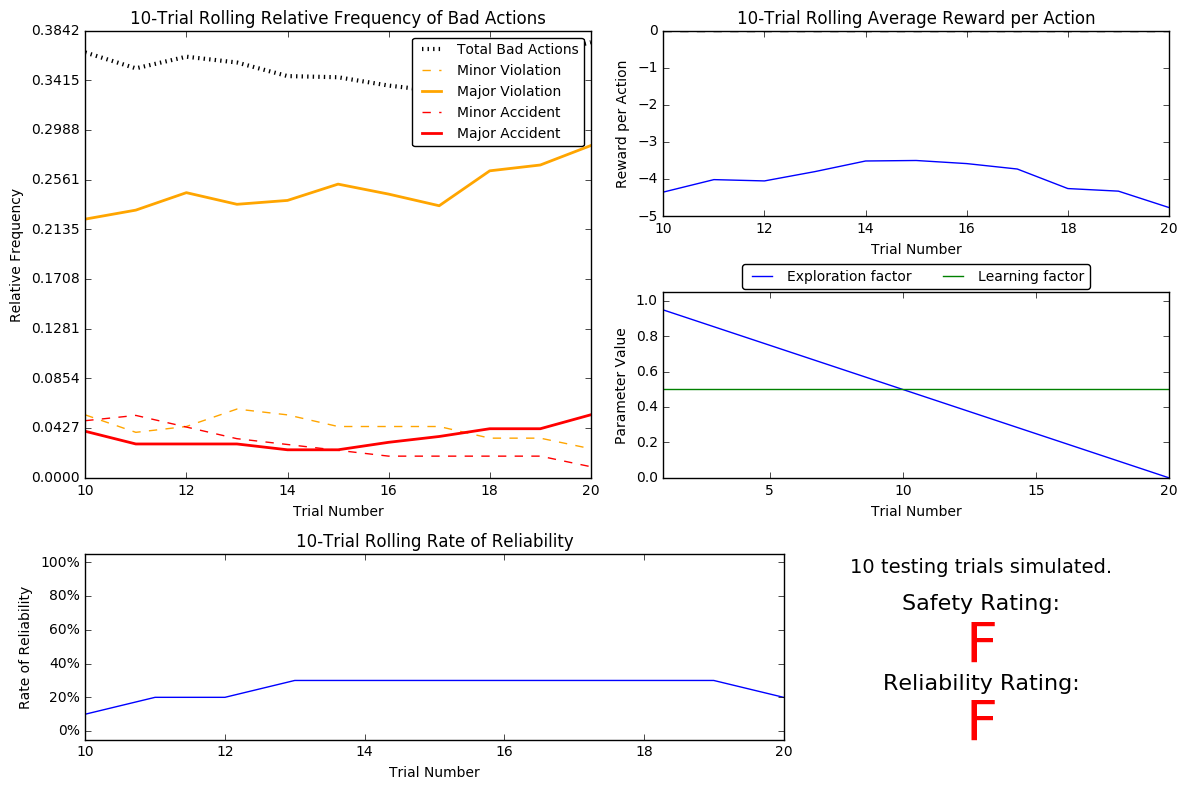

In [48]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

There are more observations that are similar between the basic driving agent and the default Q-learning agent than I would prefer there to be. Right off the bat, both the basic agent and the default Q-learning agent are failing in both the safety and reliability ratings. The bad actions are <i>less</i> frequent for the Q-learning agent (not by a lot) which is a good thing, but still more than there should be. The frequency between each result of bad decisions seem to be in line with each agent. For example, the most frequent result of bad actions is a major violation for both agents. I think the obvious first edit for me to make will be in the number of features my learning agent is considering, but will likely get there in the next step.
<br><br>
There are approximately 20 training trials required before testing was implemented. This makes sense with the epsilon-tolerance as our decay function was epsilon - 0.05 and our threshold before testing was epsilon = 0.01 where epsilon begins at 1.0. So with as epsilon decays, it is necessary for roughly 20 training trials to be conducted (0.05(20) = 1.0; epsilon decay times by the # of training trials to surpass the threshold.) for the decay function to cross the testing threshold.
<br><br>
Epsilon (exploration factor) is accurately represented in the parameters panel as it decays to 0 as the training trials are conducted.
<br><br>
As the number of training trials increased, the number of bad decisions decreased, as we would expect since we are implementing Q-learning. The average reward began to increase and then started to decrease. Even though the average reward per action is somewhat higher for the default Q-learning agent, it is still not remotely close to an optimal level and thus indicates that we should play around with our parameters some more in order to optimize the Q-learning agent.
<br><br>
As the safety and reliability rating are not better for the Q-learning agent than they were for the basic driving agent, it is clear that there is a good amount of adjusting that still needs implemented. One thing I probably want to consider is reducing my state space by using less features.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning parameters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simulation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

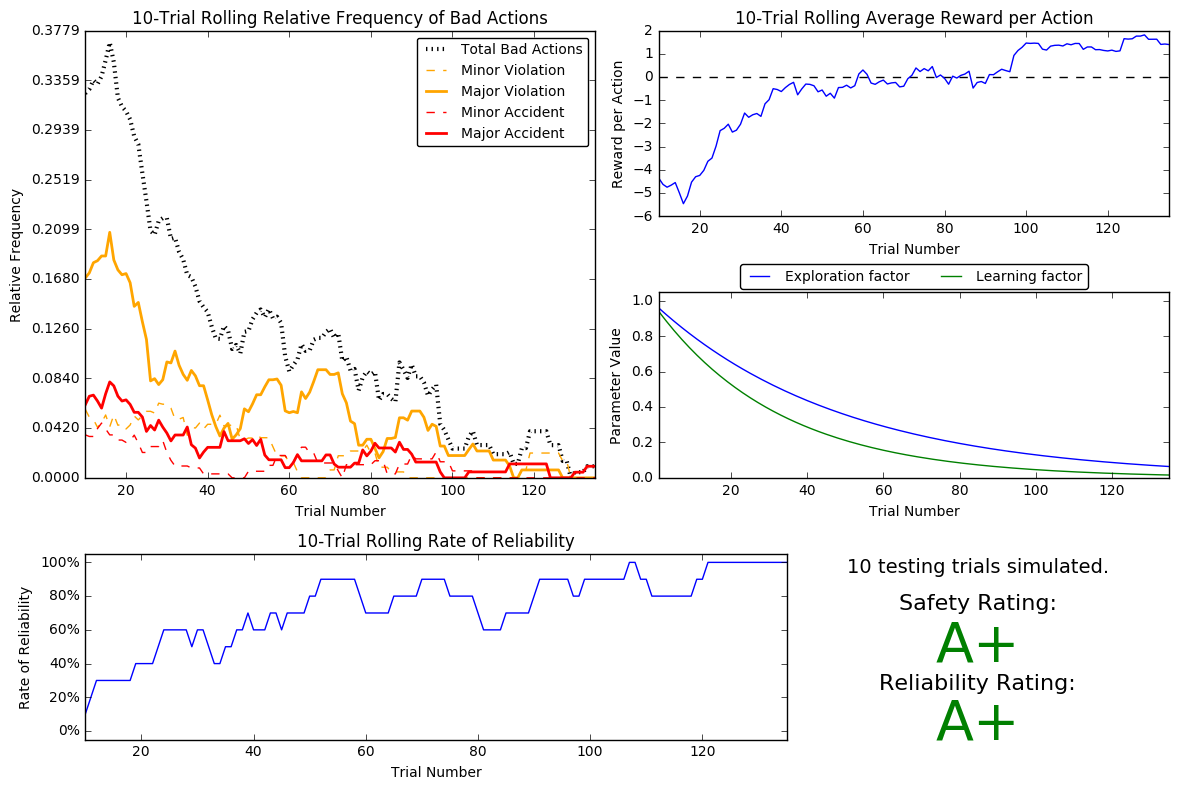

In [57]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before beginning testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

The decaying function that was used for epsilon was dependent on the time step we were iterating over, expressed as epsilon was equaled to 0.98 raised to the 'time_step' <i>t</i>. The reason I chose this decaying function was because it allowed for a smoother decay than the linear function we were previously using.
<br><br>
Using a tolerance of epsilon = 0.065 (relatively small value but allowing a reasonable number of training trials), there were approximately 135 training trials that were needed before testing was implemented. The alpha learning rate that I used was 0.75 with a decay function of 0.97 raised to the time_step <i>t</i>. The reason I chose to use a decay function on my learning rate was to put less emphasis on the reward as it continued to learn, and thus more emphasis on the prior step as the learnig continued. I thought this would be beneficial assuming the value of the reward would theoretically get smaller as more training trials would be performed.
<br><br>
There has been a lot of improvement with this "optimized" Q-learner as opposed to the default Q-learner that was run previously. The biggest improvement came from changing the features that were relevant for learning and adjusting the flags and functionality. I originally implemented an ascending sort to get my maximum Q-value for a given state, and then realized my 'choose_action' function needed to select an action from a <i>set</i> of optimal actions rather than the sorting I was doing. I also made an appropriate adjustment on my update rule and finally was able to optimize my Q-learner.
<br><br>
I would say that my Q-learner results show that my driving agent successfully learned an appropriate policy, as it indicated that the agent committed no traffic violations and always chose the correct action, all the while reaching the destination in time for every testing trip (i.e. the testing trials received an A+ for both safety and reliability).
<br><br>
I am satisfied (as I think I'm going to get) with the safety and reliability ratings of the <i>Smartcab</i> as they show to be optimal 'A+' ratings. I believe there are other adjustment combinations on the flags that would result with similar safety and reliability results, though I am satisfied with the combination I chose. I have noticed adjusting the parameters results in an extreme sensitivity to the performance of the <i>Smartcab</i> and so I don't think I would be condifident in sending this <i>Smartcab</i> out on the road regardless of its 'A+' ratings.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

Some examples of state-action pairs I should expect my <i>Smartcab</i> to follow if it were an <b>optimal policy</b> would be: <br><br>
<b>State-Action Pair Example 1:</b> Needing to turn left with oncoming traffic expecting to go forward at a green light.. I would expect my driving agent to idle until the oncoming traffic was gone and then turn left (which would be the next state-action pair with <i>no</i> oncoming traffic).
<br><br>
<b>State-Action Pair Example 2:</b> Needing to go straight at a red light with no oncoming traffic.. I would expect my driving agent to idle at the red light.
<br><br>
<b>State-Action Pair Example 3:</b> Needing to turn right with oncoming traffic expecting to turn left (their right) at a greenlight.. I would expect my driving agent to turn right at the greenlight. 
<br><br>
After examining these three examples, I believe that my driving agent has a <b>suboptimal policy</b>. I believe this as comparing my policy to what I would expect above, I can give the examples a "sniff" test:
<br><br>
<b>State-Action Pair Example 1:</b> Fails. The reward for doing nothing in this secenario is actually negative. I suppose the driving agent is still getting to the destination in the alotted amount of time given its reliability rating, however, this scenario would call for a different action. Traveling forward and traveling right are both deemed positive rewards (avoids accidents but do not go in the direction needed). From the log, we can see our <b>State-Action Pair Example 1</b> with the following Q-values for each action:
<br><br>
('left', 'green', 'forward') <br>
 -- forward : 0.92 <br>
 -- right : 0.72 <br>
 -- None : -4.57 <br>
 -- left : -18.78 <br><br>
 The 'left' in the parenthesis, or the state, indicates the direction the towards the destination (i.e. 'waypoint'), the 'green' in the state indicates the color of the light (i.e. 'light') and the 'forward' in the state indicates that the oncoming traffic (i.e. 'oncoming') intends to drive forward through the green light. Each directional term following the '--' indicates the action followed by the reward.<br>
 <br>
One might intuitively believe that this state should yield the action of idling ('None') until the oncoming traffic crosses through the intersection and then turn left as this is the direction of the destination. This action actually has a negative reward and thus the learning would imply taking the forward action. This would not be the way of our 'waypoint' direction and so should have a higher reward for 'None'. However, since this is not the case, I consider the policy to be <b>sub-optimal</b>.
<br><br>
<b>State-Action Pair Example 2:</b> Passes. This scenario accurately gives the action of staying still at the red light (all other actions are negative rewards).
<br><br>
<b>State-Action Pair Example 3:</b> Passes. This scenario accurately gives the action of turning right (but also gives positive rewards for other actions). 
<br><br>

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

I think the idea of not using future rewards is almost self explanatory. The characteristic that has to do with the <b>Smartcab</b> itself is knowing whether or not the final destination is close, and thus the driving agent may implement its own trade-off, violating traffic laws while ensuring it makes the destination on time if it is in a hurry. This would be harmful to the safety of the driving agent and so thus using future rewards should not be considered. The other characteristic (the one having to do with the <b>environment</b>) is that the destination is not always in the same place and so rewards on future states are subject to change given the location of the destination and thus Q-learning in this scenario would be invalid. Learning could then cause the driving agent to take less direct routes due to previous training trials and could result in the driving agent being less reliable.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.